# Controlling a Servo from Raspberry Pi

A *Servomotor*, or a servo, is a small device that has an output shaft. This shaft can be positioned to specific angular positions by sending the servo a coded signal. As long as the coded signal exists on the input line, the servo will maintain the angular position of the shaft. As the coded signal changes, the angular position of the shaft changes.

<center>
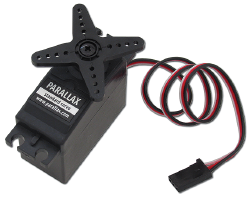
</center>

Servos are extremely useful in practice.  They may be used to operate remote-controlled toy cars, robots, or airplanes.  Servos are also used in industrial applications, robotics, in-line manufacturing, pharmaceutics, and food services.

# How is a Servo Controlled?
Servos are controlled by sending an electrical pulse of variable width, or pulse width modulation (PWM), through the control wire. There is a minimum pulse, a maximum pulse, and a repetition rate. A servo motor can usually only turn 90 degrees in either direction for a total of 180 degree movement. The motor's neutral position is defined as the position where the servo has the same amount of potential rotation in the both the clockwise or counter-clockwise direction. The PWM sent to the motor determines position of the shaft, and based on the duration of the pulse sent via the control wire; the rotor will turn to the desired position. The servo motor expects to see a pulse every 20 milliseconds (ms) and the length of the pulse will determine how far the motor turns. For example, a 1.5ms pulse will make the motor turn to the 90-degree position. Shorter than 1.5ms moves it to 0 degrees, and any longer than 1.5ms will turn the servo to 180 degrees, as diagrammed below:

<center>
    <figure align="center">
        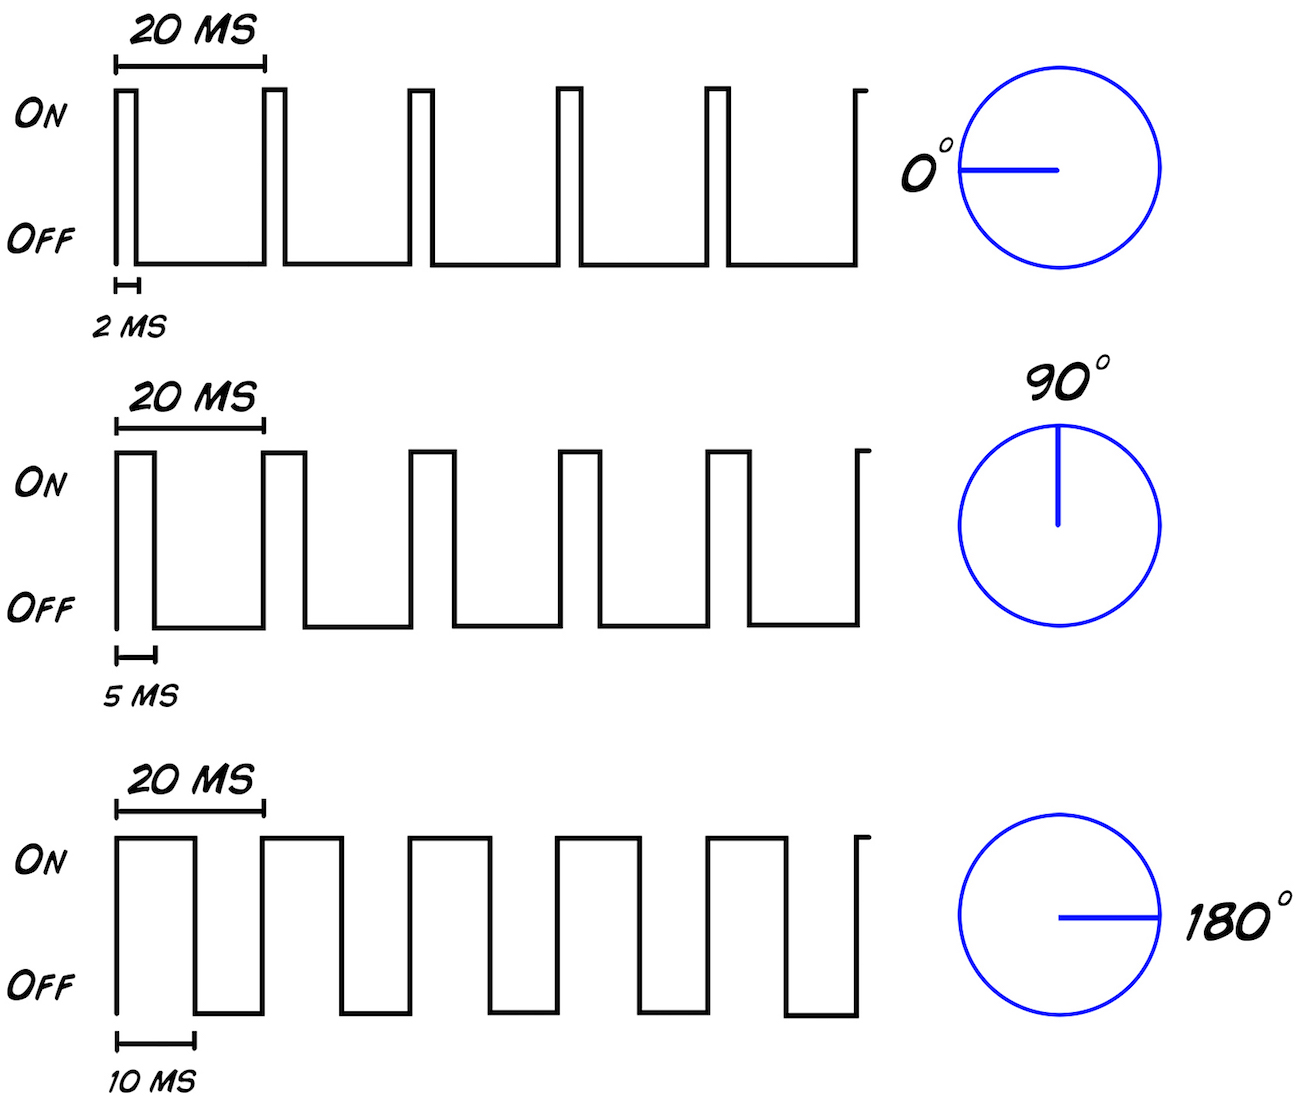
        <figcaption>
            PWM control example — <a href="https://backyardbrains.com/experiments/MuscleSpikerShield_GripperHand">Backyard Brains [CC BY-SA 3.0]</a><br/>
        </figcaption>
    </figure>
</center>

<div class="alert alert-block alert-warning">
    <b>Note</b>: The numbers in this diagram are just examples. Our servo operates from <i>0.5 ms</i> to <i>2.5 ms</i>, corresponding to a range of 0° to 180°.
</div>

When these servos are commanded to move, they will move to the position and hold that position. If an external force pushes against the servo while the servo is holding a position, the servo will resist from moving out of that position. The maximum amount of force the servo can exert is called the torque rating of the servo. Servos will not hold their position forever though; the position pulse must be repeated to instruct the servo to stay in position.

# Controlling a servo from the Raspberry Pi

To control the servo motor from the Raspberry Pi, we will utilize the `Servo` class from the GPIO Zero library, which simplifies the process significantly

The servo responds to pulse widths between 0.5 ms and 2.5 ms, with a margin of error of ±0.02 ms. When creating an instance of the Servo class, you can specify the `min_pulse_width` and `max_pulse_width` properties to match these specifications. These properties adjust the pulse width within a standard 20 ms duration.

# Example of controlling a servo from the Raspberry Pi
The following diagram shows how to connect the servo to the Raspberry Pi:

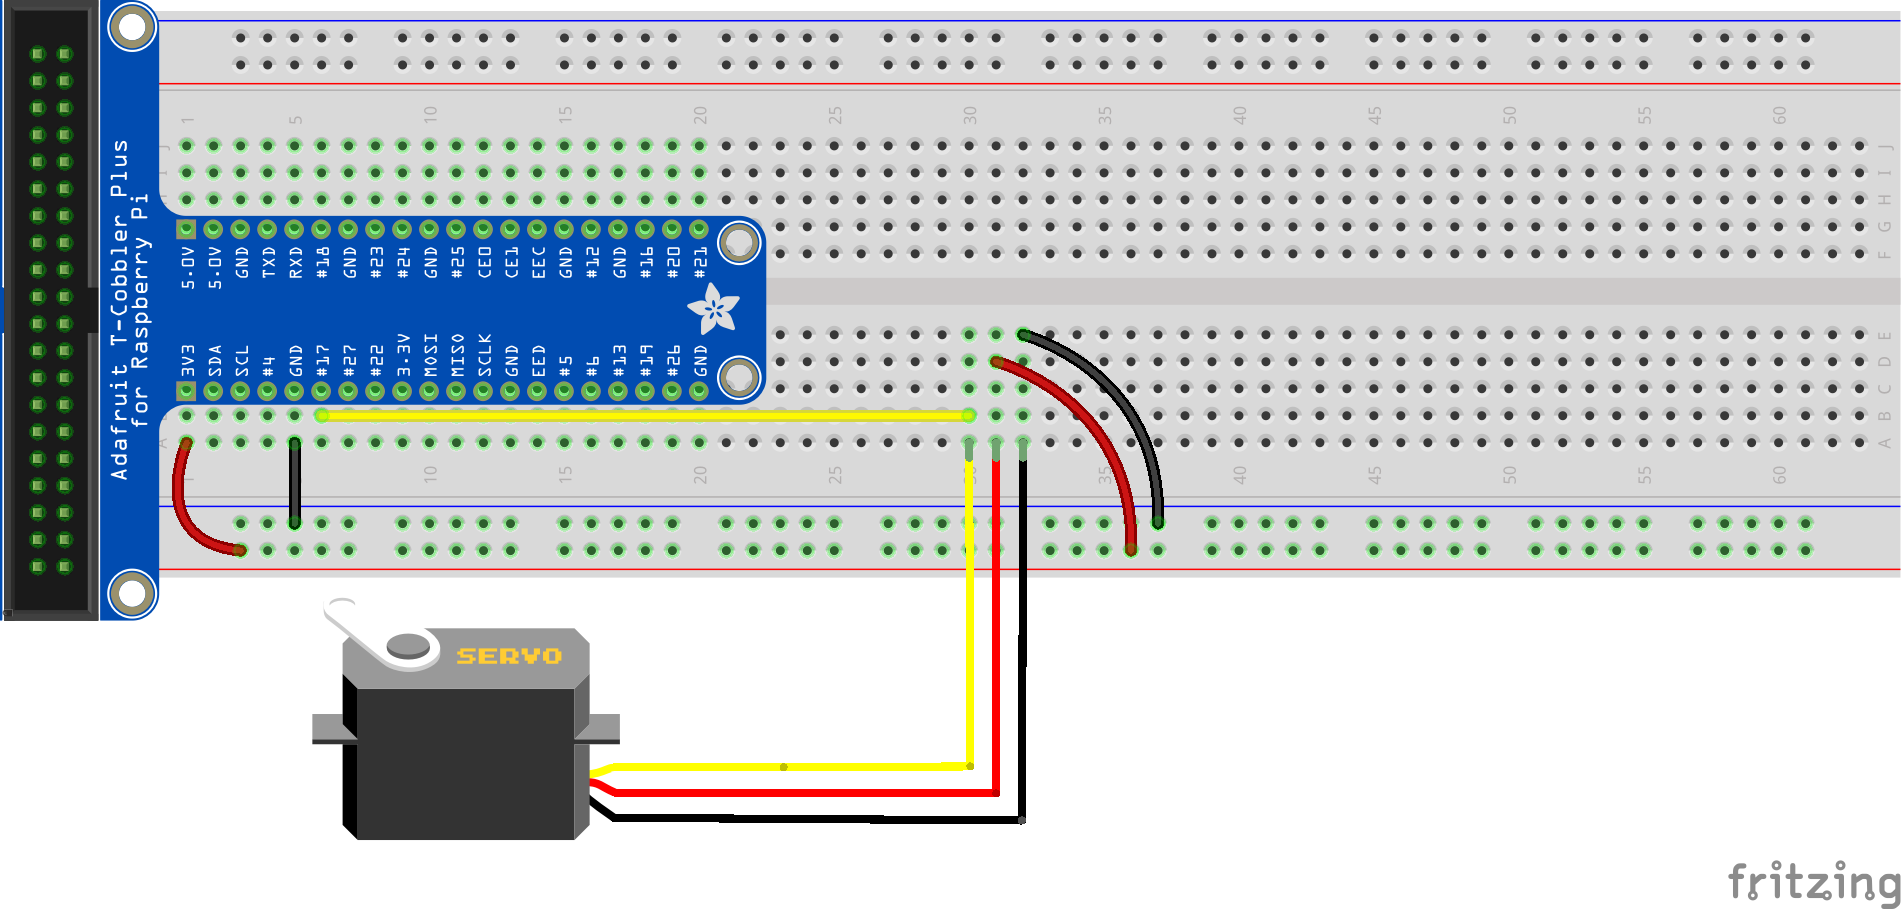

<div class="alert alert-block alert-warning">
    <b>Warning</b>: The wire colours of the servo matter here. Black is ground, red is for power, and the yellow (or white) wire is used for the signal.
</div>

The following program will control the servo making it move to its neutral position (90 degrees), wait 1 second and then move to its 0 degrees, wait 1 second and finally move to its 180 degrees. The cycle continues until interrupted:

In [ ]:
# Import all the necessary libraries
from gpiozero import Servo
from time import sleep

# Create a Servo instance with the pulse width between 0.5ms to 2.5ms
servo = Servo(17, min_pulse_width=0.5/1000, max_pulse_width=2.5/1000)

try:
    while True:
        servo.mid()
        sleep(1)
        servo.min()
        sleep(1)
        servo.max()
        sleep(2)
        
except KeyboardInterrupt:
    servo.close()

<div class="alert alert-block alert-info">
<b>Note</b>: The servo is being powered by a lower voltage than it’s rated for. While it works, it will be slower than usual.
</div>

## Exercise
Add two buttons to the circuit and extend the above program to control the servo in the following way: 
* One button will make the servo turn to its 0 degrees
* The other button will make it turn to its 180 degrees
* Pressing both buttons at the same time will make the servo turns towards 90 degrees

In [ ]:
# Your code here